In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# start = '2010-01-01'
# end = '2019-12-31'

# df = data.DataReader('AAPL', 'yahoo', start, end)
#df.head()

In [39]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
y_symbols = ['AAPL']
from datetime import datetime
startdate = datetime(2010,12,1)
enddate = datetime(2019,12,15)
df= pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)

[*********************100%***********************]  1 of 1 completed


In [40]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-01,11.259643,11.348214,11.250000,11.300000,9.632321,461750800
2010-12-02,11.340357,11.392857,11.246071,11.362500,9.685600,462837200
2010-12-03,11.321786,11.380357,11.297857,11.337143,9.663984,342092800
2010-12-06,11.380000,11.511786,11.372143,11.433929,9.746488,448481600
2010-12-07,11.564286,11.571071,11.361429,11.364643,9.687424,391454000


In [41]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-09,67.500000,67.699997,66.227501,66.730003,65.373878,128042400
2019-12-10,67.150002,67.517502,66.464996,67.120003,65.755959,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,66.316826,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,66.485832,137310400
2019-12-13,67.864998,68.824997,67.732498,68.787498,67.389565,133587600


In [42]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-12-01,11.259643,11.348214,11.250000,11.300000,9.632321,461750800
1,2010-12-02,11.340357,11.392857,11.246071,11.362500,9.685600,462837200
2,2010-12-03,11.321786,11.380357,11.297857,11.337143,9.663984,342092800
3,2010-12-06,11.380000,11.511786,11.372143,11.433929,9.746488,448481600
4,2010-12-07,11.564286,11.571071,11.361429,11.364643,9.687424,391454000


In [43]:
df = df.drop(['Date', 'Adj Close'], axis= 1)
df.head()

,Open,High,Low,Close,Volume
0,11.259643,11.348214,11.250000,11.300000,461750800
1,11.340357,11.392857,11.246071,11.362500,462837200
2,11.321786,11.380357,11.297857,11.337143,342092800
3,11.380000,11.511786,11.372143,11.433929,448481600
4,11.564286,11.571071,11.361429,11.364643,391454000


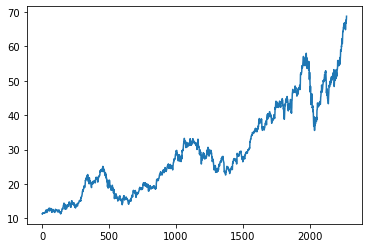

In [44]:
plt.plot(df.Close)

In [45]:
ma100 = df.Close.rolling(100).mean() #moving average 100
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2270    57.482775
2271    57.647500
2272    57.806375
2273    57.962925
2274    58.129125
Name: Close, Length: 2275, dtype: float64

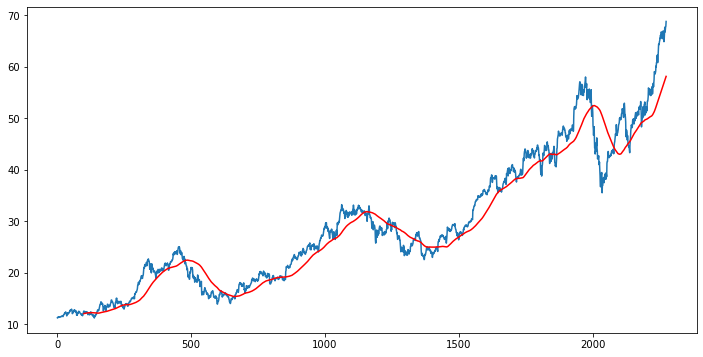

In [46]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')


In [47]:
ma200 = df.Close.rolling(200).mean() #moving average 100
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2270    52.855063
2271    52.972750
2272    53.092625
2273    53.215513
2274    53.340738
Name: Close, Length: 2275, dtype: float64

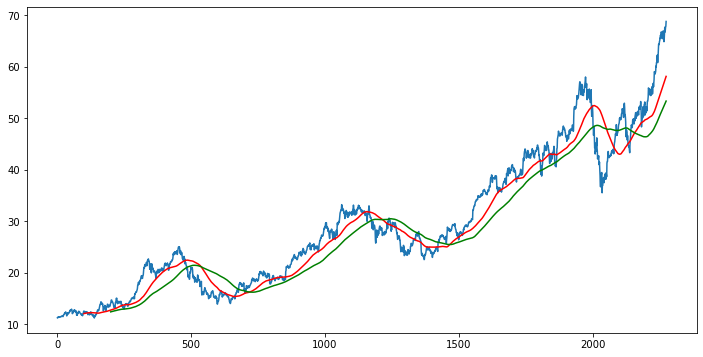

In [48]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [49]:
df.shape


(2275, 5)

In [50]:
#spliting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1592, 1)
(683, 1)


In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [52]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00155727],
       [0.00408063],
       [0.00305686],
       ...,
       [0.96729736],
       [0.99677018],
       [1.        ]])

In [53]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)


In [56]:
# ML model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [57]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences= True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences= True))
model.add(Dropout(0.3))

model.add(LSTM(units = 120, activation = 'relu', return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units= 1))


In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 120)          9

In [59]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs =50)

Epoch 1/50
47/47 [==============================] - 52s 646ms/step - loss: 0.0689
Epoch 2/50
47/47 [==============================] - 28s 591ms/step - loss: 0.0148
Epoch 3/50
47/47 [==============================] - 33s 693ms/step - loss: 0.0130
Epoch 4/50
47/47 [==============================] - 31s 654ms/step - loss: 0.0099
Epoch 5/50
47/47 [==============================] - 29s 623ms/step - loss: 0.0100
Epoch 6/50
47/47 [==============================] - 31s 657ms/step - loss: 0.0088
Epoch 7/50
47/47 [==============================] - 30s 641ms/step - loss: 0.0080
Epoch 8/50
47/47 [==============================] - 29s 625ms/step - loss: 0.0087
Epoch 9/50
47/47 [==============================] - 32s 681ms/step - loss: 0.0073
Epoch 10/50
47/47 [==============================] - 31s 656ms/step - loss: 0.0071
Epoch 11/50
47/47 [==============================] - 31s 663ms/step - loss: 0.0068
Epoch 12/50
47/47 [==============================] - 33s 708ms/step - loss: 0.0079
Epoch 13/50
4

In [60]:
model.save('keras_model.h5')

In [61]:
past_100_days = data_training.tail(100)

In [62]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\Aditi\AppData\Local\Temp\ipykernel_3700\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [63]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02431541],
       [0.0184726 ],
       [0.02773846],
       [0.03157459],
       [0.03051227],
       [0.01227574],
       [0.01605289],
       [0.        ],
       [0.00826252],
       [0.02525967],
       [0.0250236 ],
       [0.0256728 ],
       [0.03552883],
       [0.03594195],
       [0.03257793],
       [0.03588292],
       [0.03458452],
       [0.03393532],
       [0.02838762],
       [0.02230878],
       [0.02472853],
       [0.02006611],
       [0.0250236 ],
       [0.03139754],
       [0.03783052],
       [0.04863077],
       [0.04479464],
       [0.05594903],
       [0.05594903],
       [0.05966714],
       [0.06055242],
       [0.06450661],
       [0.06633616],
       [0.06698536],
       [0.06244099],
       [0.06379838],
       [0.06816574],
       [0.06521485],
       [0.0650378 ],
       [0.05966714],
       [0.06161475],
       [0.06084749],
       [0.06432957],
       [0.07200192],
       [0.07837582],
       [0.07908405],
       [0.0828612 ],
       [0.079

In [64]:
input_data.shape

(783, 1)

In [65]:
x_test =[]
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [66]:
x_test, y_test= np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(683, 100, 1)
(683,)


In [67]:
#making predictions

y_predicted = model.predict(x_test)

22/22 [==============================] - 6s 191ms/step


In [68]:
y_predicted.shape

(683, 1)

In [69]:
y_test

array([0.22556654, 0.22397312, 0.22420915, 0.23052412, 0.22609777,
       0.22397312, 0.2220845 , 0.22108121, 0.21199249, 0.21299578,
       0.20856943, 0.21317283, 0.20945467, 0.20638571, 0.21677293,
       0.21576963, 0.22385506, 0.22910765, 0.22409109, 0.22474029,
       0.22391405, 0.24120635, 0.24669498, 0.24403919, 0.24091124,
       0.25525265, 0.27915484, 0.28493867, 0.28063029, 0.28470255,
       0.29739146, 0.29503069, 0.2936733 , 0.26286592, 0.27638099,
       0.27944995, 0.28493867, 0.28381731, 0.28110245, 0.28423039,
       0.28269596, 0.28305005, 0.2776794 , 0.28015814, 0.29355524,
       0.28458448, 0.28765344, 0.29308308, 0.29084046, 0.25537062,
       0.23436025, 0.24126534, 0.23282581, 0.22769119, 0.21576963,
       0.23978989, 0.23194049, 0.23701604, 0.23559966, 0.23943579,
       0.23672102, 0.2243862 , 0.23678   , 0.22409109, 0.22609777,
       0.22302881, 0.22651085, 0.21848441, 0.22704199, 0.2322356 ,
       0.23500945, 0.23624886, 0.2482295 , 0.25572471, 0.25879

In [70]:
y_predicted

array([[0.24250673],
       [0.24084003],
       [0.23985542],
       [0.23953745],
       [0.23985218],
       [0.24071912],
       [0.2420451 ],
       [0.24364752],
       [0.24532598],
       [0.24684194],
       [0.24797432],
       [0.24852705],
       [0.24838088],
       [0.24750614],
       [0.24597968],
       [0.2439937 ],
       [0.24174175],
       [0.23945221],
       [0.23737255],
       [0.23568843],
       [0.23451495],
       [0.23391414],
       [0.2339371 ],
       [0.23466763],
       [0.23614924],
       [0.23841885],
       [0.24150825],
       [0.24560717],
       [0.25085866],
       [0.25732008],
       [0.26458094],
       [0.27222896],
       [0.2798564 ],
       [0.2877145 ],
       [0.2955522 ],
       [0.30279756],
       [0.30894145],
       [0.31358963],
       [0.31664568],
       [0.31815332],
       [0.31835988],
       [0.31763572],
       [0.3162989 ],
       [0.31459332],
       [0.3127242 ],
       [0.31087956],
       [0.30921516],
       [0.307

In [71]:
scaler.scale_

array([0.02360718])

In [72]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test*scale_factor

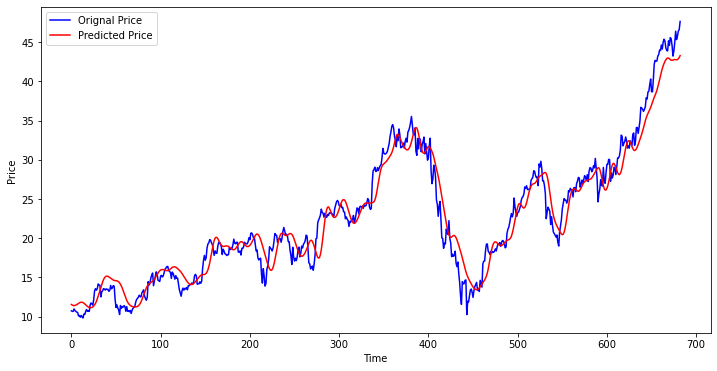

In [73]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label= 'Orignal Price')
plt.plot(y_predicted, 'r', label= 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()